# **CODSOFT INTERNSHIP**

**TASK - 3: IRIS Flower Classification**

Author: Arkansh Tripathi

Domain: Data Science

Batch: September-2024

# **Project Summary**


*   Aim of this project is to build a machine learning model to predict the category of IRIS flower based on the dataset downloaded from the Kaggle website as per CodSoft Instructions for this project.

* In this project, I have implemented muptiple classification algorithm with Python and Scikit-Learn. Accuracy of the modelis calculated and estaBlished with the help of Evaluation Metrics.   

In [1]:
# Import Libraries for data processing and modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
# Linking dataset into colab
import io
iris = pd.read_csv((io.BytesIO(uploaded['IRIS.csv'])))

In [4]:
# Dataset First Look
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.shape

(150, 5)

# **Data Pre-Processing**


*   Data have to be processed to make more easier to derive insights from it and pre-processed will be more suitable while fitting the data into an algorithm.

*   In this project, we have encoded the result column to numbers which makes easier for building an algorithm over it.

In [6]:
# Checking the null values
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Importing libraries used for encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [10]:
for col in iris.columns:
    if is_numeric_dtype(iris[col]):
        continue
    iris[col] = le.fit_transform(iris[col])

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# **Data Pre-Processing**

*   In this analysis, we have used multiple charts to see the relationships between the features present in the dataset and to know about importancr of columns which involves in the result.


In [12]:
# Created a bar chart to see thr count of species category
fig = px.bar(iris, x = 'species', color = 'species')
fig.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

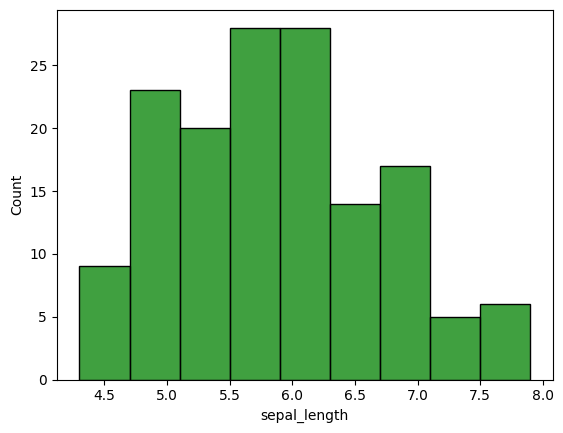

In [13]:
# Built a histogram for sepal_length data to know the relation
sns.histplot(data = iris, x = iris.sepal_length, color = 'green')

<Axes: xlabel='sepal_width', ylabel='Count'>

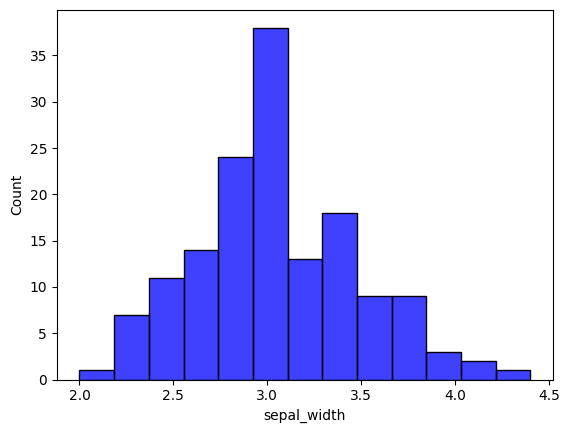

In [14]:
# Built a histogram for sepal_width data to know the relation
sns.histplot(data = iris, x = iris.sepal_width, color = 'blue')

<Axes: xlabel='petal_length', ylabel='Count'>

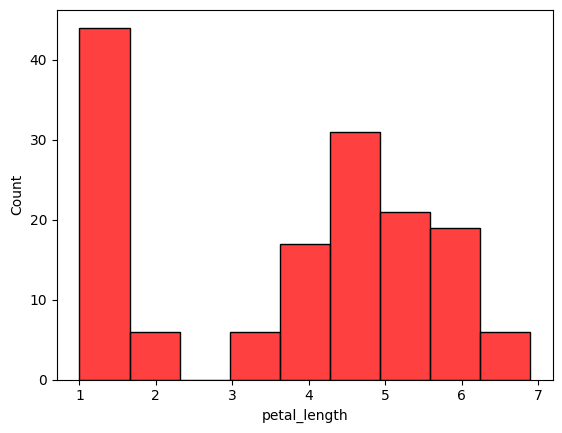

In [15]:
# Built a histogram for petal_length data to know the relation
sns.histplot(data = iris, x = iris.petal_length, color = 'red')

<Axes: xlabel='petal_width', ylabel='Count'>

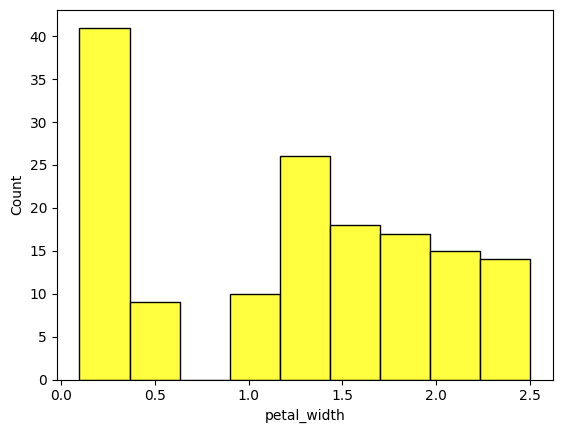

In [17]:
# Built a histogram for petal_width data to know the relation
sns.histplot(data = iris, x = iris.petal_width, color = 'yellow')

<Axes: >

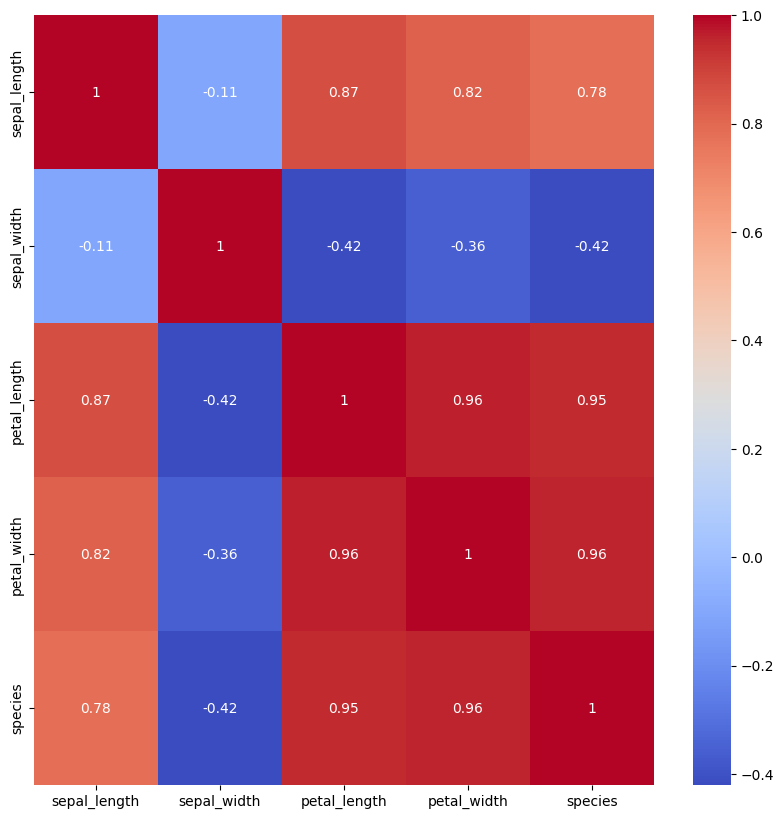

In [18]:
# Created a heatmap to see the feature-wise correlation in the dataset
corr = iris.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

# **Data Preparation**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
# Assingning the predictor and target variable
x = iris.drop('species', axis = 1)
y = iris.species

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **Model Building**

In [23]:
# Importing essential libraries for model building
from sklearn.linear_model import LogisticRegression

In [24]:
# Building machine learning model and training time
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Evaluating the model to verify the accuracy
print(f'Training Score: {model.score(X_train, y_train)}')
print(f'Testing Score: {model.score(X_test, y_test)}')

Training Score: 0.975
Testing Score: 1.0


In [26]:
# Importing essential libraries for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building machine learning model and training them
Model = RandomForestClassifier(n_estimators= 300, random_state= 100)
Model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [27]:
# knn k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and traing them
Model1 = KNeighborsClassifier(n_neighbors= 5)
Model1.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# Evaluating the model to verify the accuracy
print(f'Training Score: {Model.score(X_train, y_train)}')
print(f'Testing Score: {Model.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 1.0


# **Model Testing**

In [29]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [30]:
# For testing, We created a new dataframe with values close to the any of our existing data to evaluate.
data = {'sepal_length': [5.2], 'sepal_width': [3.1], 'petal_length': [1.4], 'petal_width': [0.2]}
df = pd.DataFrame(data)

In [31]:
# Predict the movie rating by entered data
result = Model.predict(df)
print(result)

[0]
